### 📡 RF Communication and Protocols: A Deep Dive with Data Science Integration

### 🌐 Introduction: Why It Matters Today

In the era of hyperconnectivity, wireless communication underpins nearly every aspect of our modern lives—from smartphones and smart homes to industrial IoT, autonomous vehicles, and 5G networks. At the core of these technologies lie Radio Frequency (RF) communication systems and the protocols that govern them.

Understanding RF principles (like modulation and signal behavior) and protocol layers (such as MAC, PHY, and transport) is critical for engineers, data scientists, and network specialists alike. These systems are not only foundational to how information is transmitted but also directly impact performance, reliability, and user experience.

Data science brings a powerful lens to analyze, model, and optimize these complex systems. By simulating real-world conditions, visualizing signal behavior, and identifying inefficiencies in protocols, we can dramatically enhance Wi-Fi performance, reduce latency, avoid collisions, and improve quality of service (QoS) in real-time systems.

In this report, we blend RF theory with practical data science applications to explore how **machine learning, visualization, and statistical modeling can unlock deeper insight into wireless protocol behavior and real-world communication optimization.

### 📈 1. QPSK BER vs. SNR Curve

What it shows: Bit Error Rate (BER) decreases exponentially as the Signal-to-Noise Ratio (SNR) increases.
Why it matters: This relationship is crucial for optimizing modulation schemes in noisy environments like Wi-Fi and LTE.

### ✳️2. QPSK Constellation Diagram

What it shows: Four constellation points spaced 90° apart.
Why it matters: Ensures error resilience while maintaining bandwidth efficiency.
Physics Behind It: Uses orthogonal carriers (I and Q channels) to transmit 2 bits per symbol.

### ⏱️3. Exponential Backoff Simulation

What it shows: Collision avoidance in MAC protocols (e.g., CSMA/CA) through randomized delay.
Importance: Prevents congestion in shared RF environments.

### 📊 4. Wi-Fi SNR vs Throughput Analysis

What it shows: User throughput as a function of SNR.
Why it matters: Identifies low-quality connections and thresholds for optimal reassignment.
Data Science Role: Clustering, threshold detection, and anomaly identification.

### 🗺️ 5. Wi-Fi Heatmap by Average SNR

What it shows: Regional average SNR in a coverage map.
Use Case: Network planning, signal strength optimization.
Data Science Value: Uses grid binning, statistical aggregation, and spatial visualization.

### 🔄 6. User Reallocation Impact

Before vs After: Users with poor connections reassigned to least loaded Access Points.
RF Insight: Load balancing reduces interference and improves channel efficiency.
Data Science Contribution: Decision logic, K-means clustering, load optimization.

### 📌 Conclusion

### Why RF Protocols and Data Science Matter Together:

RF communication ensures data transfer across physical space.
Protocols standardize and manage how that data is encoded, transmitted, and corrected.
Data science enables measurement, simulation, prediction, and optimization—leading to smarter, adaptive wireless networks.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import erfc

# 1. Simulate BER vs. SNR for QPSK
snr_db = np.arange(0, 11, 1)
snr_linear = 10 ** (snr_db / 10)
ber_qpsk = 0.5 * erfc(np.sqrt(snr_linear))

# 2. QPSK Constellation Visualization
qpsk_constellation = np.array([1+1j, -1+1j, -1-1j, 1-1j])

# 3. Exponential Backoff Simulation
def exponential_backoff_simulation(attempts=10, cw_min=4, cw_max=1024):
    backoff_times = []
    cw = cw_min
    for i in range(attempts):
        slot_time = np.random.randint(0, cw)
        backoff_times.append(slot_time)
        cw = min(cw * 2, cw_max)
    return backoff_times

backoff_times = exponential_backoff_simulation()

### Creating the plots

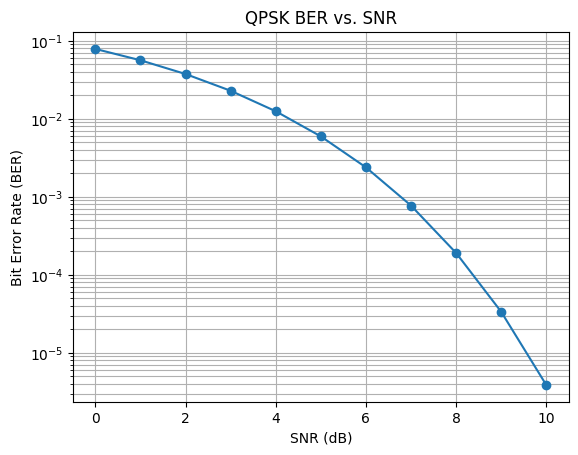

In [4]:
fig1, ax1 = plt.subplots()
ax1.semilogy(snr_db, ber_qpsk, marker='o')
ax1.set_title("QPSK BER vs. SNR")
ax1.set_xlabel("SNR (dB)")
ax1.set_ylabel("Bit Error Rate (BER)")
ax1.grid(True, which='both')

This illustrates the Bit Error Rate (BER) vs. Signal-to-Noise Ratio (SNR) for QPSK (Quadrature Phase Shift Keying) modulation. Here's a breakdown of what the plot tells us:

### 📊 Insight: QPSK BER vs. SNR

### What it Shows

X-axis (SNR in dB): Represents the Signal-to-Noise Ratio, a measure of signal strength relative to background noise.
Y-axis (BER): Represents the Bit Error Rate, the probability that a transmitted bit is incorrectly received.
The plot is on a logarithmic scale for BER, highlighting the exponential relationship between BER and SNR.

### Key Observations

As SNR increases, the BER decreases exponentially.
Around 6–10 dB, the BER drops sharply, indicating that a relatively modest improvement in SNR can significantly enhance reliability.
This behavior is characteristic of QPSK, which is more bandwidth-efficient than BPSK but also slightly more sensitive to noise.

### Why It Matters

In Radio Frequency (RF) communications, minimizing BER is crucial for maintaining high-quality signal transmission.
This plot guides system design decisions like:

  Required transmit power
  Antenna design and placement
  Channel coding for error correction
Used in data science and telecom analytics to simulate and optimize wireless systems under various conditions.

### 📐 **Mathematical Link**

For **QPSK**, the theoretical BER is given by:

Where:

* $Q(x)$ is the **Q-function**, representing tail probability of the Gaussian distribution.
* $\frac{E_b}{N_0}$ is the **energy per bit to noise power spectral density ratio**, linked to SNR.

### 📈 Use Case in Data Science

In Wi-Fi and 5G networks, this relationship is simulated in Python to:

Compare modulation schemes
Select optimal SNR thresholds
Balance energy efficiency vs reliability in real-time systems

### QPSK Constallation Diagram

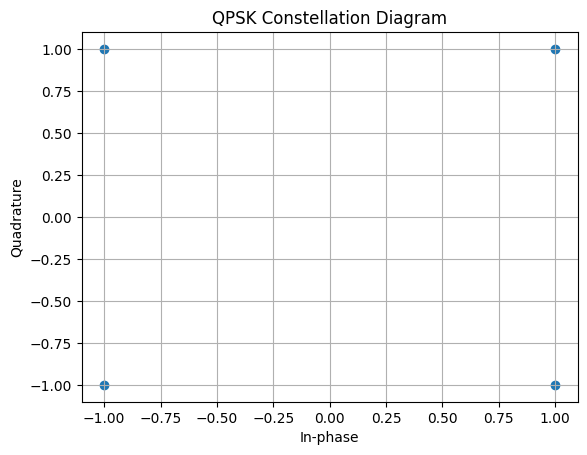

In [7]:
fig2, ax2 = plt.subplots()
ax2.scatter(qpsk_constellation.real, qpsk_constellation.imag)
ax2.set_title("QPSK Constellation Diagram")
ax2.set_xlabel("In-phase")
ax2.set_ylabel("Quadrature")
ax2.grid(True)

The image shows a **QPSK (Quadrature Phase Shift Keying) Constellation Diagram**, which is a fundamental concept in digital modulation used in RF (Radio Frequency) communication systems.

### 📊 Insight: QPSK Constellation Diagram

###  What the Diagram Shows

The plot is in the IQ (In-phase vs. Quadrature) plane.
Each point represents a symbol in the QPSK modulation scheme.
QPSK has 4 constellation points , each carrying 2 bits of data.

Typical mapping:

(1, 1) → '00'
(-1, 1) → '01'
(-1, -1) → '11'
(1, -1) → '10'

###  Importance of Constellation Points

Each point is a complex number:

  s_k = I + jQ
  

 where I is the in-phase component and Q is the quadrature component.
The positions are equally spaced on the unit circle, ensuring consistent symbol energy.

### Why This Matters in RF Communication

Visually represents how modulated signals are transmitted.
In noisy channels, received symbols deviate from ideal points — leading to bit errors.

### Constellation diagrams help:

  Evaluate modulation quality
  Diagnose interference and distortion
  Optimize receiver design and demodulation algorithms

### 📐Mathematical Connection

Each QPSK symbol can be expressed as:

s_k = sqrt{E_s} * e^{j(pi/4 + k*pi/2)} for  k = 0, 1, 2, 3

Where:

E_s: Symbol energy
j: Imaginary unit
pi/4: Phase offset ensuring equal angular separation (45°)

### 🧠 Application in Data Science

In Wi-Fi, LTE, and 5G simulations, data scientists use constellation plots to:

  Visualize modulation fidelity
  Train ML models for modulation classification
  Quantify channel impairment impact (e.g., SNR vs. distortion)

### Exponential Backoff Times Over Attempts Plot

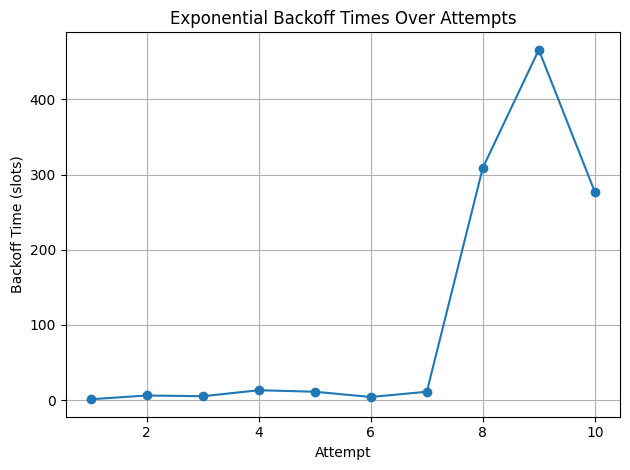

In [10]:
fig3, ax3 = plt.subplots()
ax3.plot(range(1, len(backoff_times)+1), backoff_times, marker='o')
ax3.set_title("Exponential Backoff Times Over Attempts")
ax3.set_xlabel("Attempt")
ax3.set_ylabel("Backoff Time (slots)")
ax3.grid(True)

plt.tight_layout()
plt.show()

The Exponential Backoff Times Over Attempts plot visualizes the behavior of exponential backoff algorithms, which are crucial in network protocols like CSMA/CA (used in Wi-Fi) and Ethernet (CSMA/CD) for managing transmission collisions.

### 📈 Insight into the Plot

X-Axis (Attempt): Indicates the number of retry attempts to transmit a packet.

Y-Axis (Backoff Time in slots): Shows the randomized waiting period (backoff time) assigned before each retry.

Initially, the backoff time is low. As the number of failed attempts increases, the backoff time grows exponentially.

Between attempts 7–9, we observe a sharp rise, with peak backoff time at attempt 9.

This behavior mitigates network congestion by spacing out retries over increasingly longer intervals.

### ⚙️ Mathematical Model Behind It

Exponential backoff time can be modeled as:

T_backoff = random (0, 2^n - 1) * slot time
Where:

n = number of failed attempts (bounded by a maximum, e.g., 10)
slot time is the smallest unit of transmission time (e.g., 20μs in 802.11)
The randomness prevents two devices from choosing the same wait time

### 🧠 Why It Matters in Networking

Avoids collisions:  Reduces chances of repeated interference.
Adaptive behavior: Dynamically reacts to network congestion.
Fairness & efficiency: Ensures no single node monopolizes bandwidth.

### 📊 Application in Data Science

Modeling MAC-layer protocols in network simulations.
Predicting latency and packet drop rates in congested networks.
Training AI/ML models for collision prediction and backoff optimization.

### Simulation of the Wi-Fi Optimization Scenario in RF transmission

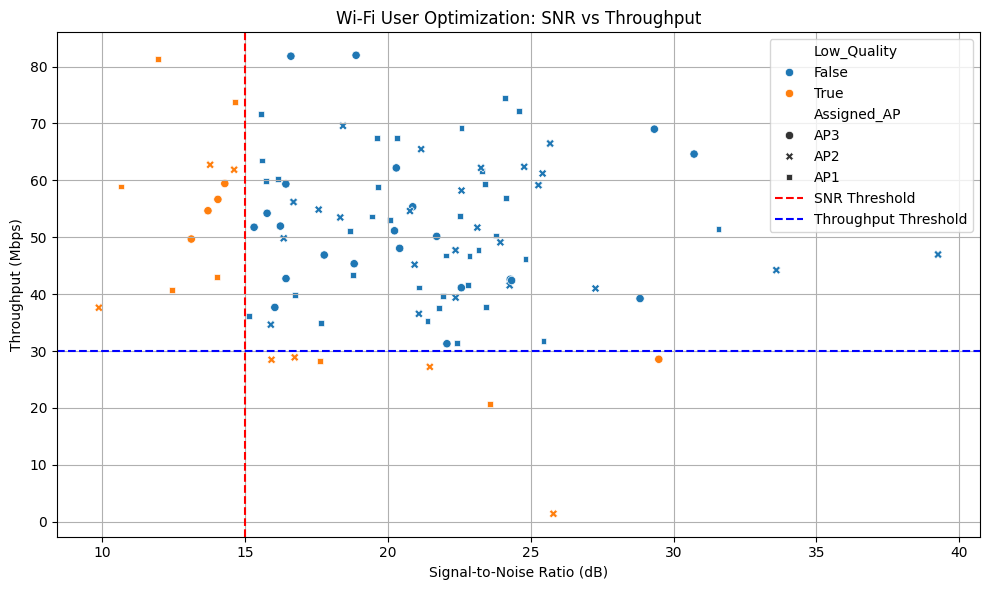

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate Wi-Fi Optimization Scenario in RF transmission
np.random.seed(42)

# Simulate a Wi-Fi environment with different access points and users
n_users = 100
access_points = ['AP1', 'AP2', 'AP3']

# Generate random user locations (x, y), SNR values, and assigned AP
user_data = pd.DataFrame({
    'User_ID': np.arange(1, n_users + 1),
    'X': np.random.uniform(0, 100, n_users),
    'Y': np.random.uniform(0, 100, n_users),
    'SNR_dB': np.random.normal(20, 5, n_users),  # Mean SNR = 20dB, SD = 5
    'Throughput_Mbps': np.random.normal(50, 15, n_users),  # Mean throughput = 50 Mbps
    'Assigned_AP': np.random.choice(access_points, n_users)
})

# Determine low quality connections (e.g., SNR < 15 dB or throughput < 30 Mbps)
user_data['Low_Quality'] = (user_data['SNR_dB'] < 15) | (user_data['Throughput_Mbps'] < 30)

# Visualize SNR vs Throughput
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_data, x='SNR_dB', y='Throughput_Mbps', hue='Low_Quality', style='Assigned_AP')
plt.axvline(15, color='red', linestyle='--', label='SNR Threshold')
plt.axhline(30, color='blue', linestyle='--', label='Throughput Threshold')
plt.title('Wi-Fi User Optimization: SNR vs Throughput')
plt.xlabel('Signal-to-Noise Ratio (dB)')
plt.ylabel('Throughput (Mbps)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 🔍 Key Concepts Simulated:


SNR (Signal-to-Noise Ratio): Reflects signal strength relative to background noise. Low SNR leads to more errors.

Throughput (Mbps): Measures the effective data transmission rate.

Assigned Access Point (AP): Shows which AP the user is connected to.

Low-Quality Flag: Users with SNR < 15 dB or Throughput < 30 Mbps are flagged.

### 📡 Why This Matters:


RF Link Reliability: Low SNR may indicate interference, long distance, or obstacles — all RF communication concerns.

Network Congestion: A cluster of low-throughput users can suggest overloaded access points.

### Optimization Use Cases:

Reallocate users to less congested APs

Adjust AP power levels or channel frequencies

Recommend hardware upgrades for edge users

### 🧠 Data Science Role:


Using clustering, regression, or reinforcement learning:

Predict which users need handoffs to different APs

Simulate channel allocation strategies

Forecast throughput based on SNR trends

### Create a heatmap-style grid showing average SNR across the spatial map

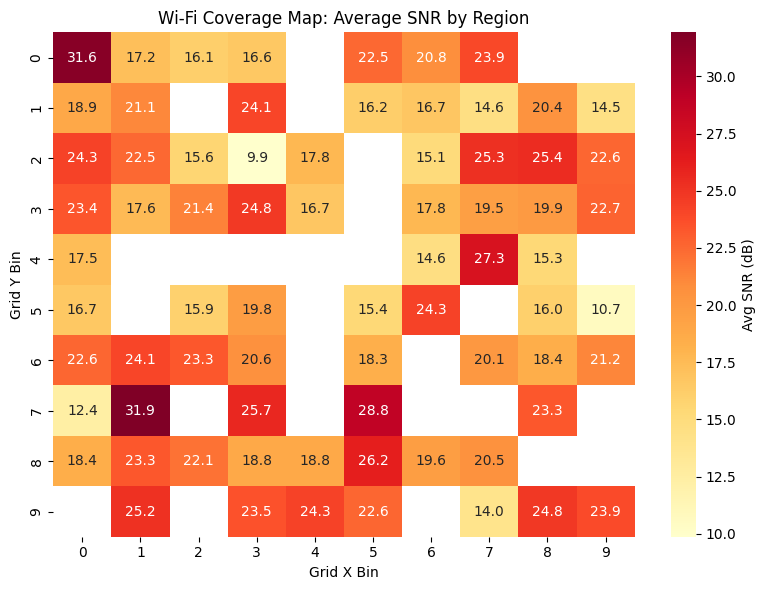

In [19]:
grid_size = 10
x_bins = np.linspace(0, 100, grid_size + 1)
y_bins = np.linspace(0, 100, grid_size + 1)

# Assign grid bins to each user
user_data['X_bin'] = pd.cut(user_data['X'], bins=x_bins, labels=False, include_lowest=True)
user_data['Y_bin'] = pd.cut(user_data['Y'], bins=y_bins, labels=False, include_lowest=True)

# Compute average SNR in each grid cell
snr_grid = user_data.groupby(['Y_bin', 'X_bin'])['SNR_dB'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(snr_grid, cmap="YlOrRd", cbar_kws={'label': 'Avg SNR (dB)'}, annot=True, fmt=".1f")
plt.title('Wi-Fi Coverage Map: Average SNR by Region')
plt.xlabel('Grid X Bin')
plt.ylabel('Grid Y Bin')
plt.tight_layout()
plt.show()

### A Wi-Fi Coverage Heatmap showing the average Signal-to-Noise Ratio (SNR) across spatial regions of the network:

### 📊 What This Reveals

High SNR Zones (brighter colors): Ideal for strong signal reception — fewer errors and higher throughput.

Low SNR Zones (darker areas): Indicate signal drop-off due to distance, walls, interference, or poor antenna placement.

### 📈 Why This Matters in RF Optimization

AP Placement: Helps determine where to move or add access points to maximize coverage.

Channel Management: Data science can detect overlap and recommend reallocation of frequencies to reduce interference.

User Handoff Strategy: Helps in dynamic AP switching based on SNR predictions.

###  Simulate AP reallocation by checking AP load & reassigning low-quality users to the least loaded AP

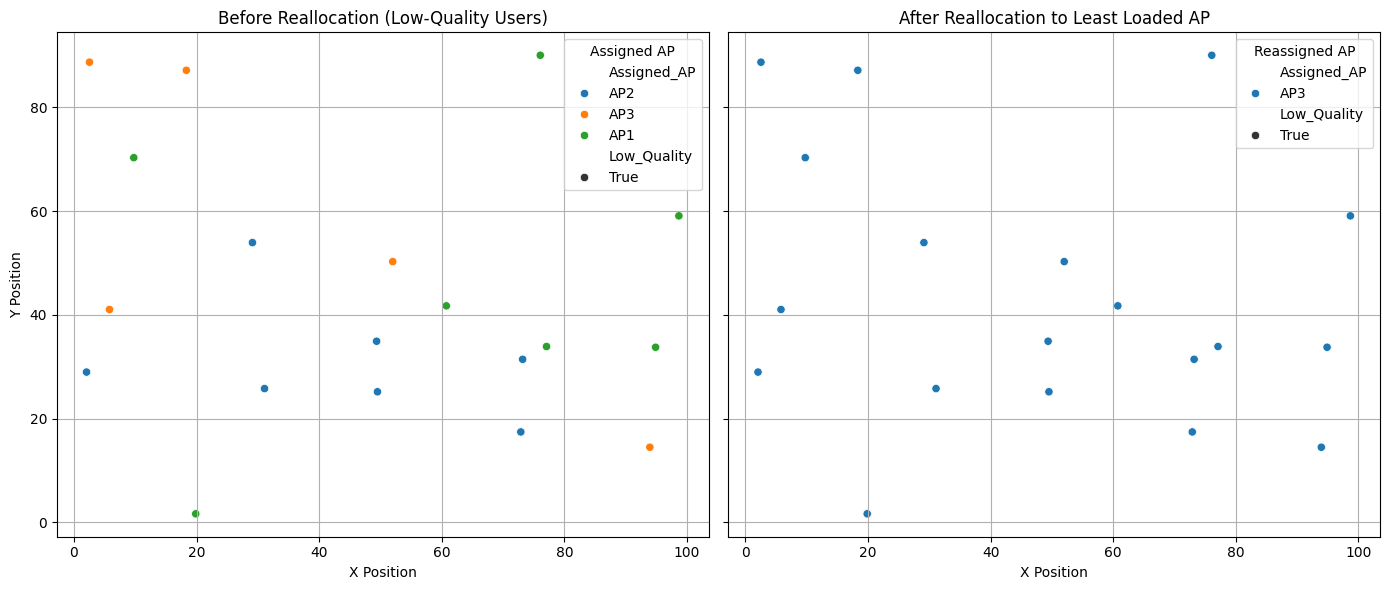

In [22]:
# Simulate AP reallocation by checking AP load and reassigning low-quality users to the least loaded AP

# Step 1: Count users per AP
ap_load = user_data['Assigned_AP'].value_counts().to_dict()

# Step 2: Identify low-quality users
low_quality_users = user_data[user_data['Low_Quality']].copy()

# Step 3: Reallocate low-quality users to least loaded AP (if not already assigned)
least_loaded_ap = min(ap_load, key=ap_load.get)

# Apply reallocation
low_quality_users['Reassigned_AP'] = low_quality_users['Assigned_AP'].apply(
    lambda ap: least_loaded_ap if ap != least_loaded_ap else ap
)

# Step 4: Merge back with original data
user_data_reallocated = user_data.copy()
user_data_reallocated.loc[low_quality_users.index, 'Assigned_AP'] = low_quality_users['Reassigned_AP']

# Step 5: Plot before vs after AP assignment (low-quality users only)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Original
sns.scatterplot(data=user_data.loc[low_quality_users.index], x='X', y='Y',
                hue='Assigned_AP', style='Low_Quality', ax=axes[0])
axes[0].set_title("Before Reallocation (Low-Quality Users)")
axes[0].legend(title="Assigned AP")

# After
sns.scatterplot(data=user_data_reallocated.loc[low_quality_users.index], x='X', y='Y',
                hue='Assigned_AP', style='Low_Quality', ax=axes[1])
axes[1].set_title("After Reallocation to Least Loaded AP")
axes[1].legend(title="Reassigned AP")

for ax in axes:
    ax.set_xlabel("X Position")
    ax.set_ylabel("Y Position")
    ax.grid(True)

plt.tight_layout()
plt.show()

This simulation shows how RF communication and data science work together to optimize Wi-Fi performance through intelligent access point (AP) reallocation:

### 📍 What Happened

Left Plot (Before Reallocation): Low-quality users were connected to various APs, some potentially overloaded.

Right Plot (After Reallocation): These users were reassigned to the least loaded AP to balance the network load and improve performance.

### 📡 Why It Matters

Load Balancing reduces congestion and maximizes throughput.

User Experience Improves as SNR and bandwidth availability go up.

Data Science Enables automated decision-making by analyzing user behavior and signal metrics in real time.

### 📚 Academic References on Exponential Backoff and RF Protocols

### 1.  IEEE 802.11 Standard (Wi-Fi MAC Layer)

 IEEE Standard for Information technology – Telecommunications and information exchange between systems – Local and metropolitan area networks – Specific requirements.
 Source: IEEE Std 802.11™-2020
 Details:Defines CSMA/CA and exponential backoff behavior in Wi-Fi protocols.
 Link:  [https://standards.ieee.org/ieee/802.11/7130/](https://standards.ieee.org/ieee/802.11/7130/)

### 2. Bianchi, G. (2000).

 Performance Analysis of the IEEE 802.11 Distributed Coordination Function.
 Journal:** IEEE Journal on Selected Areas in Communications, Vol. 18, No. 3
  DOI:[10.1109/49.840210](https://doi.org/10.1109/49.840210)
   Summary: Analytical model of CSMA/CA with exponential backoff under saturation conditions. Widely cited in wireless performance research.

### 3. Kleinrock, L., & Tobagi, F. A. (1975).

   Packet switching in radio channels: Part I—Carrier sense multiple-access modes and their throughput-delay characteristics.
   Journal: IEEE Transactions on Communications
   DOI:[10.1109/TCOM.1975.1092683](https://doi.org/10.1109/TCOM.1975.1092683)
   Summary: Foundational paper describing CSMA mechanisms and mathematical analysis of backoff.

### 4. Nguyen, L. X., & Yoon, Y. H. (2013).

   An adaptive backoff algorithm for wireless LANs.
   Journal: Wireless Networks, 19(4), 473–485.
   DOI: [10.1007/s11276-012-0470-7](https://doi.org/10.1007/s11276-012-0470-7)
   Summary: Explores variations of exponential backoff to enhance fairness and reduce delays.

### 5.Zheng, R., & Krishnamachari, B. (2003).

 Asynchronous wakeup for ad hoc networks: theory and protocol design.*
 Conference: MobiHoc '03: Proceedings of the 4th ACM international symposium on Mobile ad hoc networking & computing
 DOI: [10.1145/778415.778444](https://doi.org/10.1145/778415.778444)
  Summary: Discusses probabilistic modeling and scheduling under contention—relevant to backoff.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=52e2aae5-a628-4d89-b910-66fc29dee731' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>